In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='solarizedl', context='notebook', ticks=True, grid=False)


In [2]:
df1=pd.read_csv('Details.csv')

In [3]:
df1.head(5)

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card


In [4]:
df1.shape

(1500, 7)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1500 non-null   object
 1   Amount        1500 non-null   int64 
 2   Profit        1500 non-null   int64 
 3   Quantity      1500 non-null   int64 
 4   Category      1500 non-null   object
 5   Sub-Category  1500 non-null   object
 6   PaymentMode   1500 non-null   object
dtypes: int64(3), object(4)
memory usage: 82.2+ KB


In [6]:
df1.isnull().sum()

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
dtype: int64

In [7]:
for i in df1.columns:
    print(i,"->",df1[i].nunique())
    print(40*'*')

Order ID -> 500
****************************************
Amount -> 590
****************************************
Profit -> 406
****************************************
Quantity -> 14
****************************************
Category -> 3
****************************************
Sub-Category -> 17
****************************************
PaymentMode -> 5
****************************************


In [8]:
df2=pd.read_csv('Orders.csv')
df2.head()

,Order ID,Order Date,CustomerName,State,City
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura
1,B-25993,03-02-2018,Madhav,Delhi,Delhi
2,B-25973,24-01-2018,Madan Mohan,Uttar Pradesh,Mathura
3,B-25923,27-12-2018,Gopal,Maharashtra,Mumbai
4,B-25757,21-08-2018,Vishakha,Madhya Pradesh,Indore


In [9]:
df2.shape

(500, 5)

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 19.7+ KB


In [11]:
df = pd.merge(df1, df2, on='Order ID', how='left')
df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City
0,B-25681,1096,658,7,Electronics,Electronic Games,COD,04-06-2018,Bhawna,Madhya Pradesh,Indore
1,B-26055,5729,64,14,Furniture,Chairs,EMI,10-03-2018,Harivansh,Uttar Pradesh,Mathura
2,B-25955,2927,146,8,Furniture,Bookcases,EMI,16-01-2018,Shiva,Maharashtra,Pune
3,B-26093,2847,712,8,Electronics,Printers,Credit Card,27-03-2018,Sarita,Maharashtra,Pune
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card,01-04-2018,Vrinda,Maharashtra,Pune


In [12]:
df.isnull().sum()

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
Order Date      0
CustomerName    0
State           0
City            0
dtype: int64

In [13]:
df.describe()

,Amount,Profit,Quantity
count,1500.000000,1500.00000,1500.000000
mean,291.847333,24.64200,3.743333
std,461.924620,168.55881,2.184942
min,4.000000,-1981.00000,1.000000
25%,47.750000,-12.00000,2.000000
50%,122.000000,8.00000,3.000000
75%,326.250000,38.00000,5.000000
max,5729.000000,1864.00000,14.000000


In [14]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format="%d-%m-%Y")

In [15]:
df['Order Date'].dtype

dtype('<M8[ns]')

In [17]:
agg_df = df.groupby('Order Date').agg({
    'Profit': 'sum',
    'Amount': 'sum',
    'Quantity': 'sum'
}).reset_index()

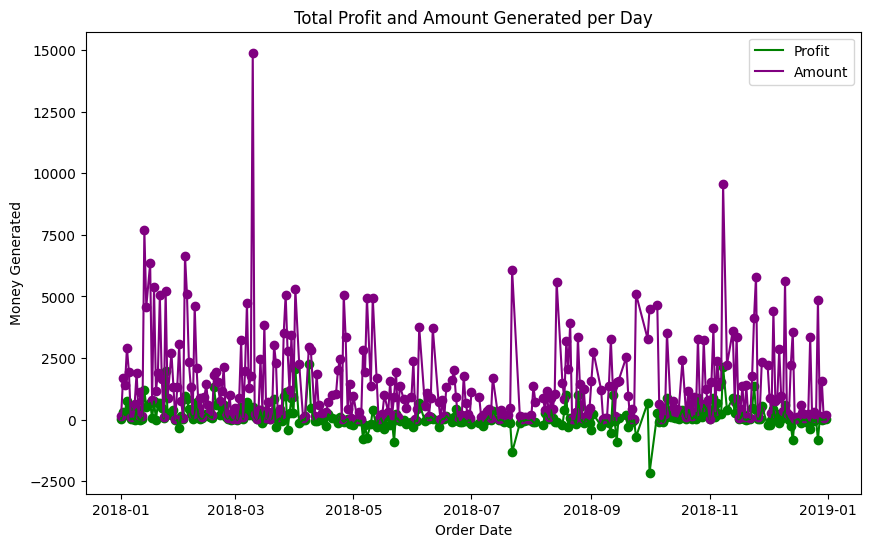

In [18]:
import matplotlib.pyplot as plt

# Convert 'Order Date' to datetime if not already
agg_df['Order Date'] = pd.to_datetime(agg_df['Order Date'])

# Plotting Profit
plt.figure(figsize=(10, 6))
plt.plot(agg_df['Order Date'], agg_df['Profit'], label='Profit', color='g')
plt.scatter(agg_df['Order Date'], agg_df['Profit'], color='g')

# Plotting Amount
plt.plot(agg_df['Order Date'], agg_df['Amount'], label='Amount', color='purple')
plt.scatter(agg_df['Order Date'], agg_df['Amount'], color='purple')

# Adding labels and title
plt.title('Total Profit and Amount Generated per Day')
plt.xlabel('Order Date')
plt.ylabel('Money Generated')

# Adding legend
plt.legend()

# Show plot
plt.show()


C:\Users\welcome\AppData\Local\Temp\ipykernel_12328\356835988.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0,1].set_xticklabels(State_df['State'], rotation=90)
C:\Users\welcome\AppData\Local\Temp\ipykernel_12328\356835988.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1,0].set_xticklabels(State_df['State'], rotation=90)
C:\Users\welcome\AppData\Local\Temp\ipykernel_12328\356835988.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1,1].set_xticklabels(top10_city['City'],rotation=90)  # Rotate x-axis labels for better readability


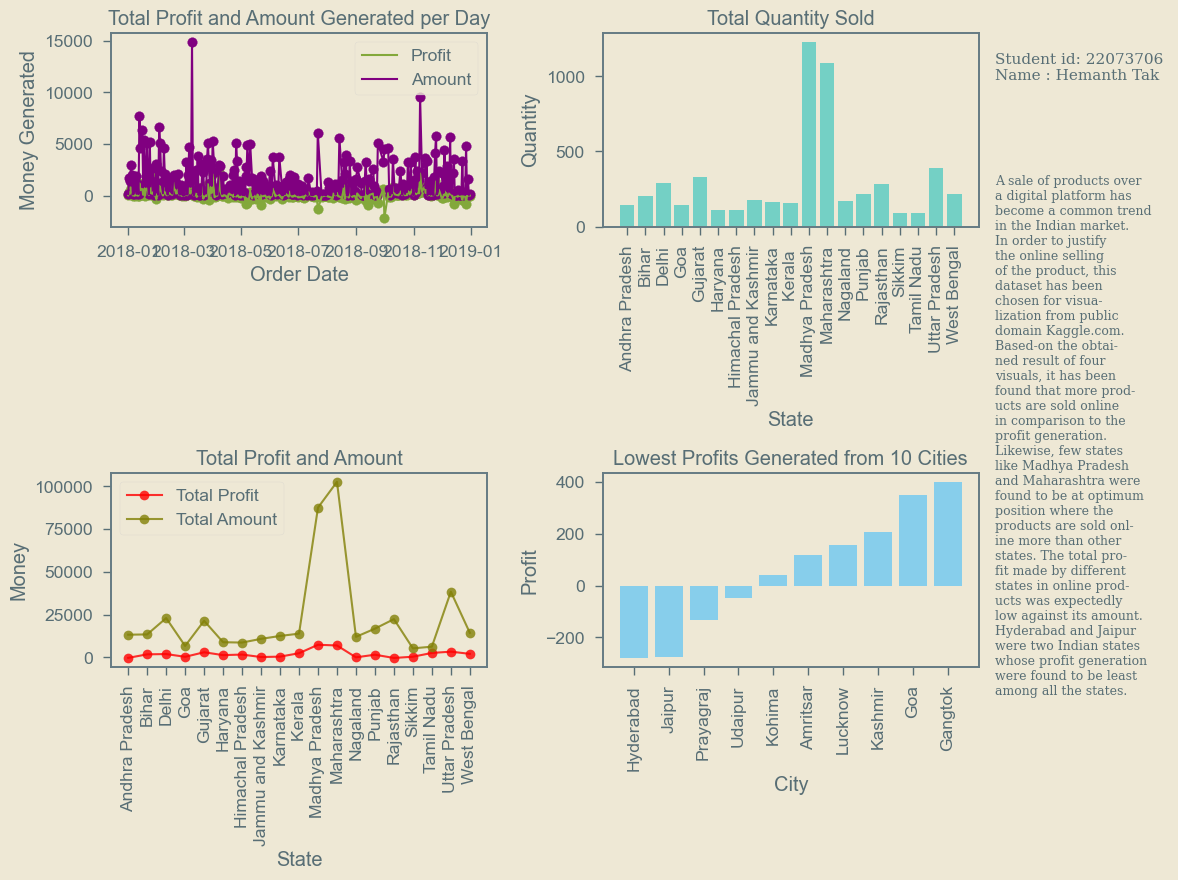

In [63]:
fig, axs = plt.subplots(2, 3, figsize=(15,9),tight_layout={'w_pad': 1.0})
axs[0, 0].plot(agg_df['Order Date'], agg_df['Profit'], label='Profit', color='g')
axs[0,0].scatter(agg_df['Order Date'], agg_df['Profit'], color='g')
axs[0,0].plot(agg_df['Order Date'], agg_df['Amount'], label='Amount', color='purple')
axs[0,0].scatter(agg_df['Order Date'], agg_df['Amount'], color='purple')
axs[0,0].set_title('Total Profit and Amount Generated per Day')
axs[0,0].set_xlabel('Order Date')
axs[0,0].set_ylabel('Money Generated')
axs[0,0].legend()

#plot axs[0,1]
axs[0,1].bar(State_df['State'], State_df['Quantity'], color=(65/255, 198/255, 191/255, 0.7))
axs[0,1].set_title('Total Quantity Sold')
axs[0,1].set_xlabel('State')
axs[0,1].set_ylabel('Quantity')
axs[0,1].set_xticklabels(State_df['State'], rotation=90)

#plot axs[1,0]

axs[1,0].plot(State_df['State'], State_df['Profit'], marker='o', color=(255/255, 0, 0, 0.8), label='Total Profit')
axs[1,0].plot(State_df['State'], State_df['Amount'], marker='o', color=(130/255, 128/255, 7/255, 0.8), label='Total Amount')
axs[1,0].set_title('Total Profit and Amount')
axs[1,0].set_xlabel('State')
axs[1,0].set_ylabel('Money')
axs[1,0].set_xticklabels(State_df['State'], rotation=90)
axs[1,0].legend()

#plot axs[1,1]

axs[1,1].bar(top10_city['City'], top10_city['Profit'], color='skyblue')
axs[1,1].set_title('Lowest Profits Generated from 10 Cities')
axs[1,1].set_xlabel('City')
axs[1,1].set_ylabel('Profit')
axs[1,1].set_xticklabels(top10_city['City'],rotation=90)  # Rotate x-axis labels for better readability

fig.delaxes(axs[0, 2])
fig.delaxes(axs[1, 2])

fig.text(0.67, 0.2,
'''A sale of products over
a digital platform has
become a common trend
in the Indian market.
In order to justify
the online selling
of the product, this
dataset has been
chosen for visua-
lization from public
domain Kaggle.com.
Based-on the obtai-
ned result of four
visuals, it has been
found that more prod-
ucts are sold online
in comparison to the
profit generation.
Likewise, few states
like Madhya Pradesh
and Maharashtra were
found to be at optimum
position where the
products are sold onl-
ine more than other
states. The total pro-
fit made by different
states in online prod-
ucts was expectedly
low against its amount.
Hyderabad and Jaipur
were two Indian states
whose profit generation
were found to be least
among all the states.
'''
, fontsize=9, fontweight='light', fontfamily='serif')

fig.text(0.67, 0.90,
'''Student id: 22073706 
Name : Hemanth Tak'''
, fontsize=11, fontweight='light', fontfamily='serif')

# Show plot
# plt.show()
plt.savefig('22073706',dpi=300)


In [19]:
State_df = df.groupby('State').agg({
    'Profit': 'sum',
    'Amount': 'sum',
    'Quantity': 'sum'
}).reset_index()

In [20]:
avgState_df = df.groupby('State').agg({
    'Profit': 'mean',
    'Amount': 'mean',
}).reset_index()
avgState_df = avgState_df.sort_values(by='Profit', ascending=False)

C:\Users\welcome\AppData\Local\Temp\ipykernel_12328\637391945.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(State_df['State'], rotation=90)
C:\Users\welcome\AppData\Local\Temp\ipykernel_12328\637391945.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(State_df['State'], rotation=90)


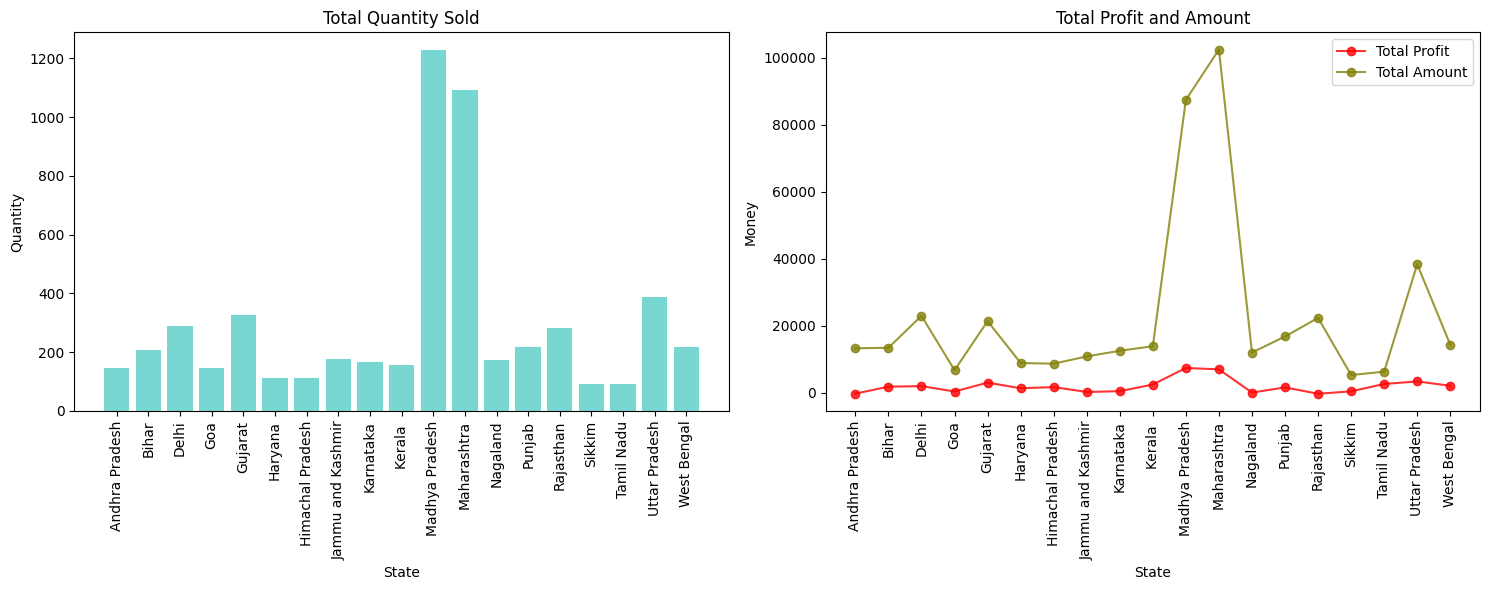

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already defined State_df DataFrame and bar_trace, line_trace_profit, line_trace_amount

# Create subplot with one row and two columns
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Add bar graph to the left subplot
axs[0].bar(State_df['State'], State_df['Quantity'], color=(65/255, 198/255, 191/255, 0.7))
axs[0].set_title('Total Quantity Sold')
axs[0].set_xlabel('State')
axs[0].set_ylabel('Quantity')
axs[0].set_xticklabels(State_df['State'], rotation=90)

# Add line graphs to the right subplot
axs[1].plot(State_df['State'], State_df['Profit'], marker='o', color=(255/255, 0, 0, 0.8), label='Total Profit')
axs[1].plot(State_df['State'], State_df['Amount'], marker='o', color=(130/255, 128/255, 7/255, 0.8), label='Total Amount')
axs[1].set_title('Total Profit and Amount')
axs[1].set_xlabel('State')
axs[1].set_ylabel('Money')
axs[1].set_xticklabels(State_df['State'], rotation=90)
axs[1].legend()

# Adjust layout to prevent subplot titles from overlapping
plt.tight_layout()

# Show plot
plt.show()



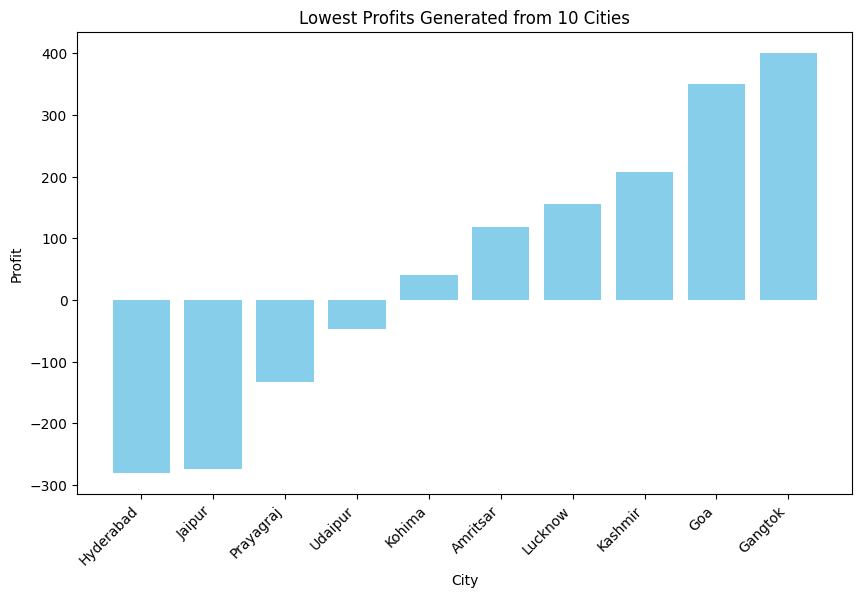

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already defined the 'city' DataFrame and 'top10_city'

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(top10_city['City'], top10_city['Profit'], color='skyblue')
plt.title('Lowest Profits Generated from 10 Cities')
plt.xlabel('City')
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show plot
plt.show()
